### [텍스트 전처리] -> 함수로!

- 토큰화 => 최적 토큰화 패키지 선택
- 정제(불용어, 구두점, 개발자 지정 제거 문자)
- 단어사전(정수)
- 문장 ==> 수치화
- 문장 길이 통일 => 패딩
- 정수 수치화 ==> One-hot encoding 변환: 파이토치 필요 X

### [모델]
- 임베딩 층: 차원 축소 (예: 샘플 5개, 피쳐 3000개  ==> 샘플 5개, 피쳐 30개 )
- RNN/LSTM/GRU 층 (모델 상속 받아 )

### [임베딩]


In [1]:
## 단어 사전 생성
train_data = "you need to know how to code"

# 중복 제거된 단어들의 집합인 단어집합 생성
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑
vocab = {word: i+2 for i, word in enumerate(word_set)}
vocab['<pad>'] = 0
vocab['<unk>'] = 1

print(vocab)

{'know': 2, 'to': 3, 'how': 4, 'code': 5, 'need': 6, 'you': 7, '<pad>': 0, '<unk>': 1}


- 8개!!

In [2]:
import torch
import torch.nn as nn

In [3]:
# 임의의 임베딩의 룩업테이블
embedding_table = torch.FloatTensor([
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0],
    [0.2, 0.9, 0.3],
    [0.1, 0.5, 0.7],
    [0.2, 0.1, 0.8],
    [0.4, 0.1, 0.1],
    [0.1, 0.8, 0.9],
    [0.6, 0.1, 0.1]  
])

- 8행!!

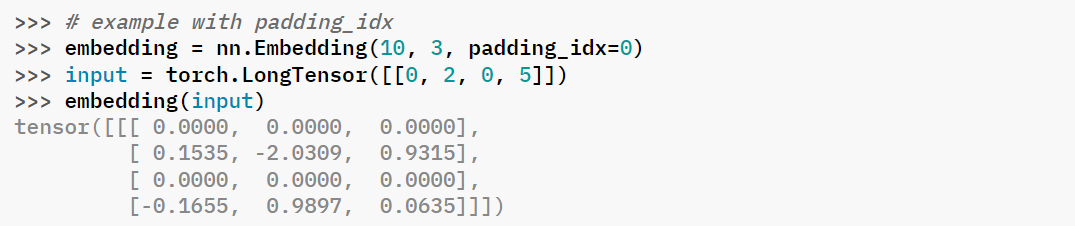

출처: https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html#torch.nn.Embedding 

* nn.Embedding(10,3)

	- 10 => 0번 토큰, 1번 토큰, ... 9번 토큰	==>  10개
	-  3 => 10개 토큰을 3개 토큰으로 줄이겠다!

* [0,2,0,5] ==> 0번째, 2번째 토큰 값을 모두 [0.0, 0.0, 0.0] 맞추기


In [4]:
## 토큰 정수 ==> 임베딩 벡터 변환
sample = 'you need to run'.split()
idxes = []

# 각 단어를 정수로 변환
for word in sample:
    try:
        idxes.append(vocab[word])
        
	# 단어 집합에 없는 단어일 경우 <unk> 대체
    except KeyError:
        idxes.append(vocab['<unk>'])
        
# 텐서화 진행
idxes = torch.LongTensor(idxes)
print(f'idxes: {idxes}')

# 각 정수를 인덱스로 임베딩 테이블에서 값 가져오기
lookup_result = embedding_table[idxes, :]
print(lookup_result)

idxes: tensor([7, 6, 3, 1])
tensor([[0.6000, 0.1000, 0.1000],
        [0.1000, 0.8000, 0.9000],
        [0.1000, 0.5000, 0.7000],
        [0.0000, 0.0000, 0.0000]])


In [5]:
## Pytorch Embedding Layer
embedding_layer = nn.Embedding(num_embeddings = len(vocab),		# height
							embedding_dim = 3,					# width
                               padding_idx=0)

In [6]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000],
        [ 1.3750, -0.2252, -1.2597],
        [-0.3594,  2.0400,  0.9437],
        [-2.0611,  1.4216,  1.1546],
        [-2.5399, -1.1876,  0.8038],
        [ 1.5641, -0.8778, -2.5614],
        [ 0.6950,  0.4123,  0.6026],
        [-1.2441,  0.5415,  0.8833]], requires_grad=True)
